# IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from xgboost import XGBClassifier

# DATASETS

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/loan prediction/Training Data.csv')
#data = pd.read_csv('Training Data.csv')
df = data

# DATA EXPLORATION

In [7]:
df.shape

(252000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


So we see that there are no missing values in the data

In [8]:
dup=df.duplicated()

In [9]:
dup.value_counts()

False    252000
Name: count, dtype: int64

So we see that there are no duplicate values as well.

# UNIVARIATE ANALYSIS

In [10]:
df['Married/Single'].value_counts()

Married/Single
single     226272
married     25728
Name: count, dtype: int64

<Axes: xlabel='Married/Single', ylabel='count'>

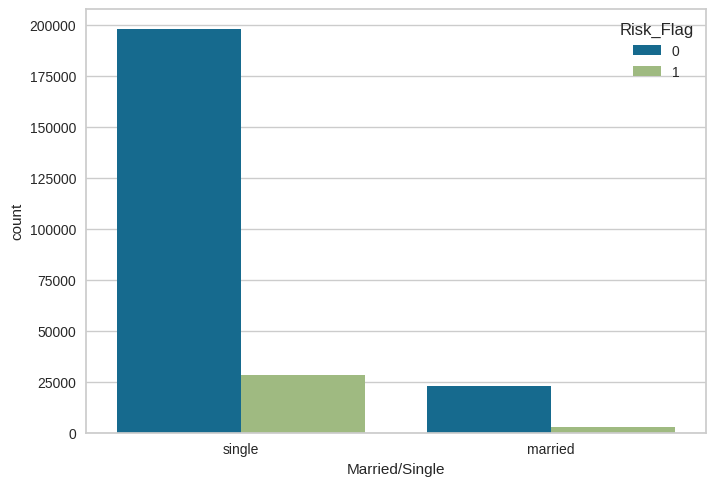

In [11]:
sns.countplot(x='Married/Single',data=df,hue='Risk_Flag')

In [12]:
df['House_Ownership'].value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

<Axes: xlabel='House_Ownership', ylabel='count'>

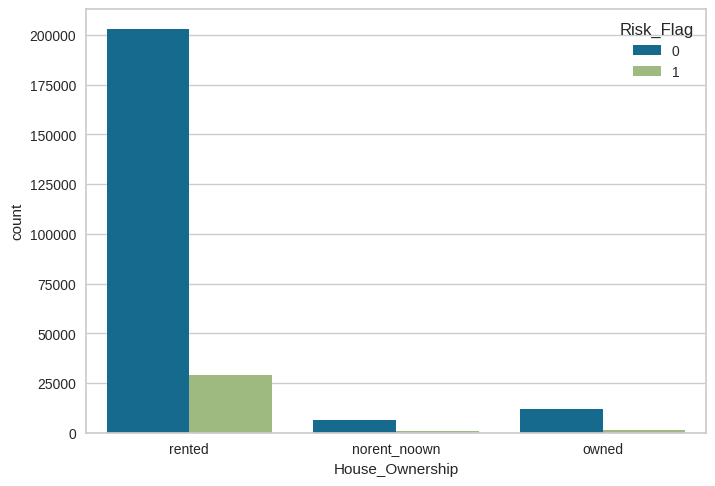

In [13]:
sns.countplot(x='House_Ownership',data=df,hue='Risk_Flag')

In [14]:
df['Car_Ownership'].value_counts()

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64

<Axes: xlabel='Car_Ownership', ylabel='count'>

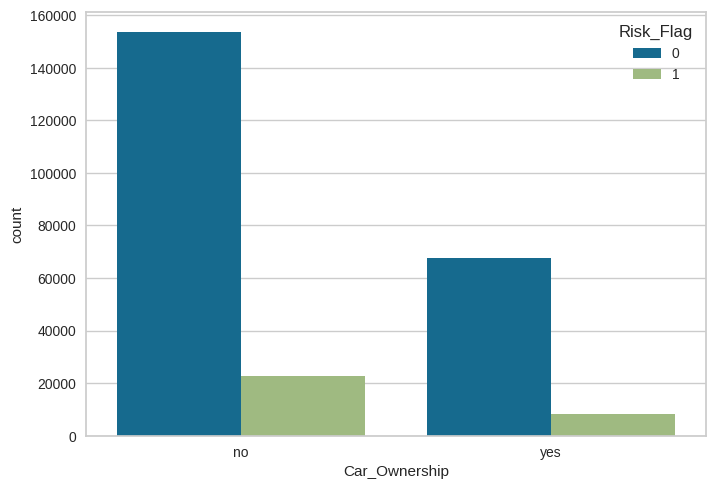

In [15]:
sns.countplot(x='Car_Ownership',data=df,hue='Risk_Flag')

In [16]:
df['Profession'].value_counts()

Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

In [17]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

So we see that the data is an imbalanced one.

<Axes: xlabel='Age', ylabel='Density'>

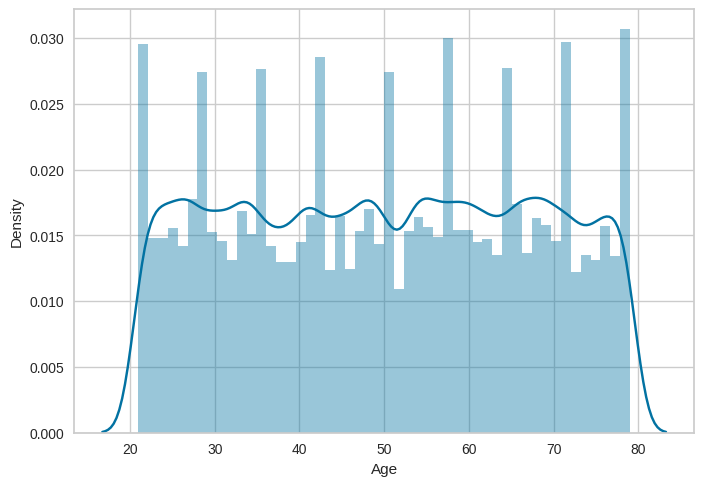

In [18]:
sns.distplot(df['Age'])

<Axes: xlabel='Income', ylabel='Density'>

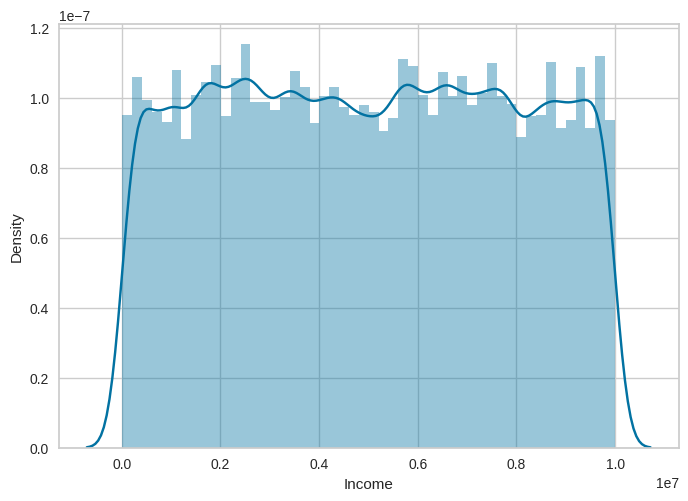

In [19]:
sns.distplot(df['Income'])

<Axes: xlabel='Experience', ylabel='Density'>

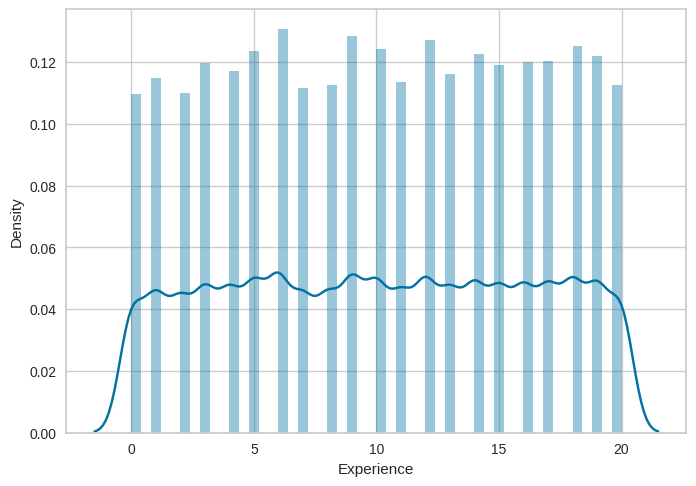

In [20]:
sns.distplot(df['Experience'])

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='Density'>

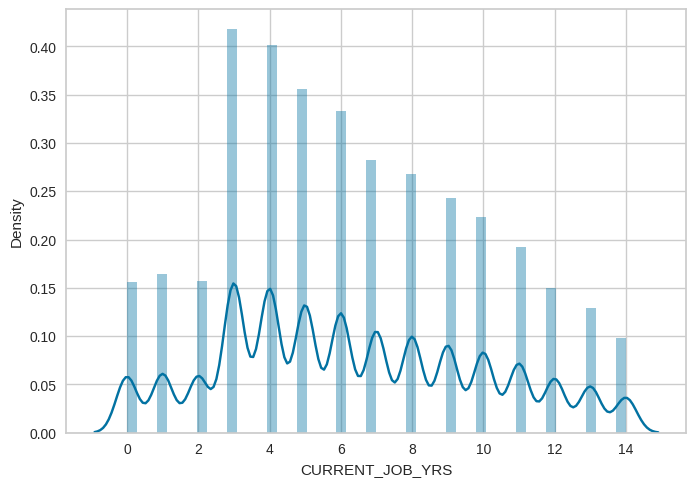

In [21]:
sns.distplot(df['CURRENT_JOB_YRS'])

<Axes: xlabel='CURRENT_HOUSE_YRS', ylabel='Density'>

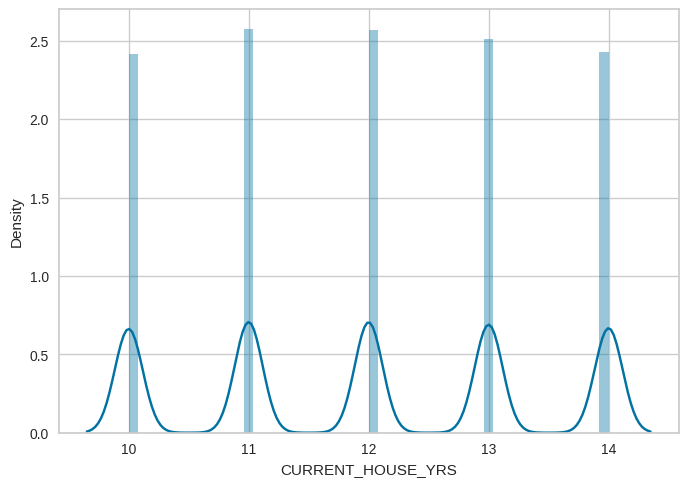

In [22]:
sns.distplot(df['CURRENT_HOUSE_YRS'])

# Univariate analysis:Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data.

In [23]:
nums = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
cats = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


In [24]:
df_3 = df.copy()

In [25]:
df_3.drop(['Id', 'Risk_Flag'], axis=1, inplace=True)

In [26]:
df_3.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


In [27]:
from sklearn.preprocessing import MinMaxScaler
df_3['Income_std'] = MinMaxScaler().fit_transform(df_3['Income'].values.reshape(len(df_3),1))
df_3[['Income','Income_std']].describe()

,Income,Income_std
count,2.520000e+05,252000.000000
mean,4.997117e+06,0.499198
std,2.878311e+06,0.288130
min,1.031000e+04,0.000000
25%,2.503015e+06,0.249529
50%,5.000694e+06,0.499557
75%,7.477502e+06,0.747495
max,9.999938e+06,1.000000


# BOX **PLOT** **bold text**

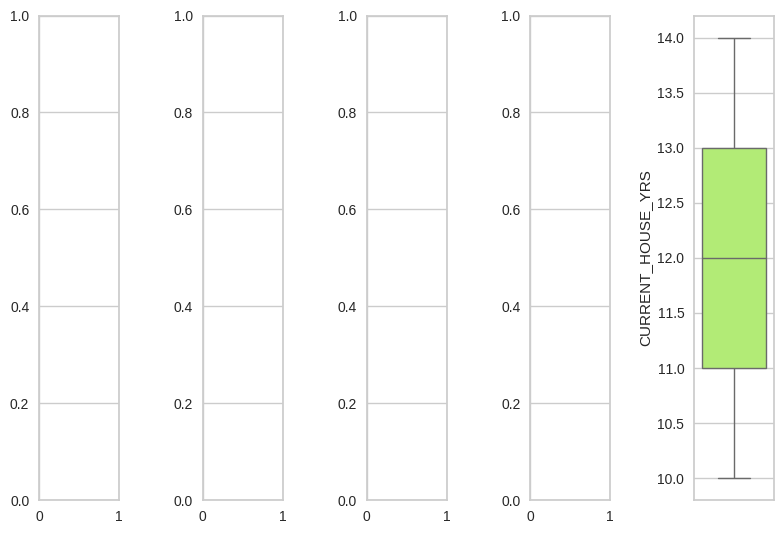

In [28]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
sns.boxplot(y=df_3[features[i]], color='#B2FF62', orient='v')
plt.tight_layout()

**Count plot**

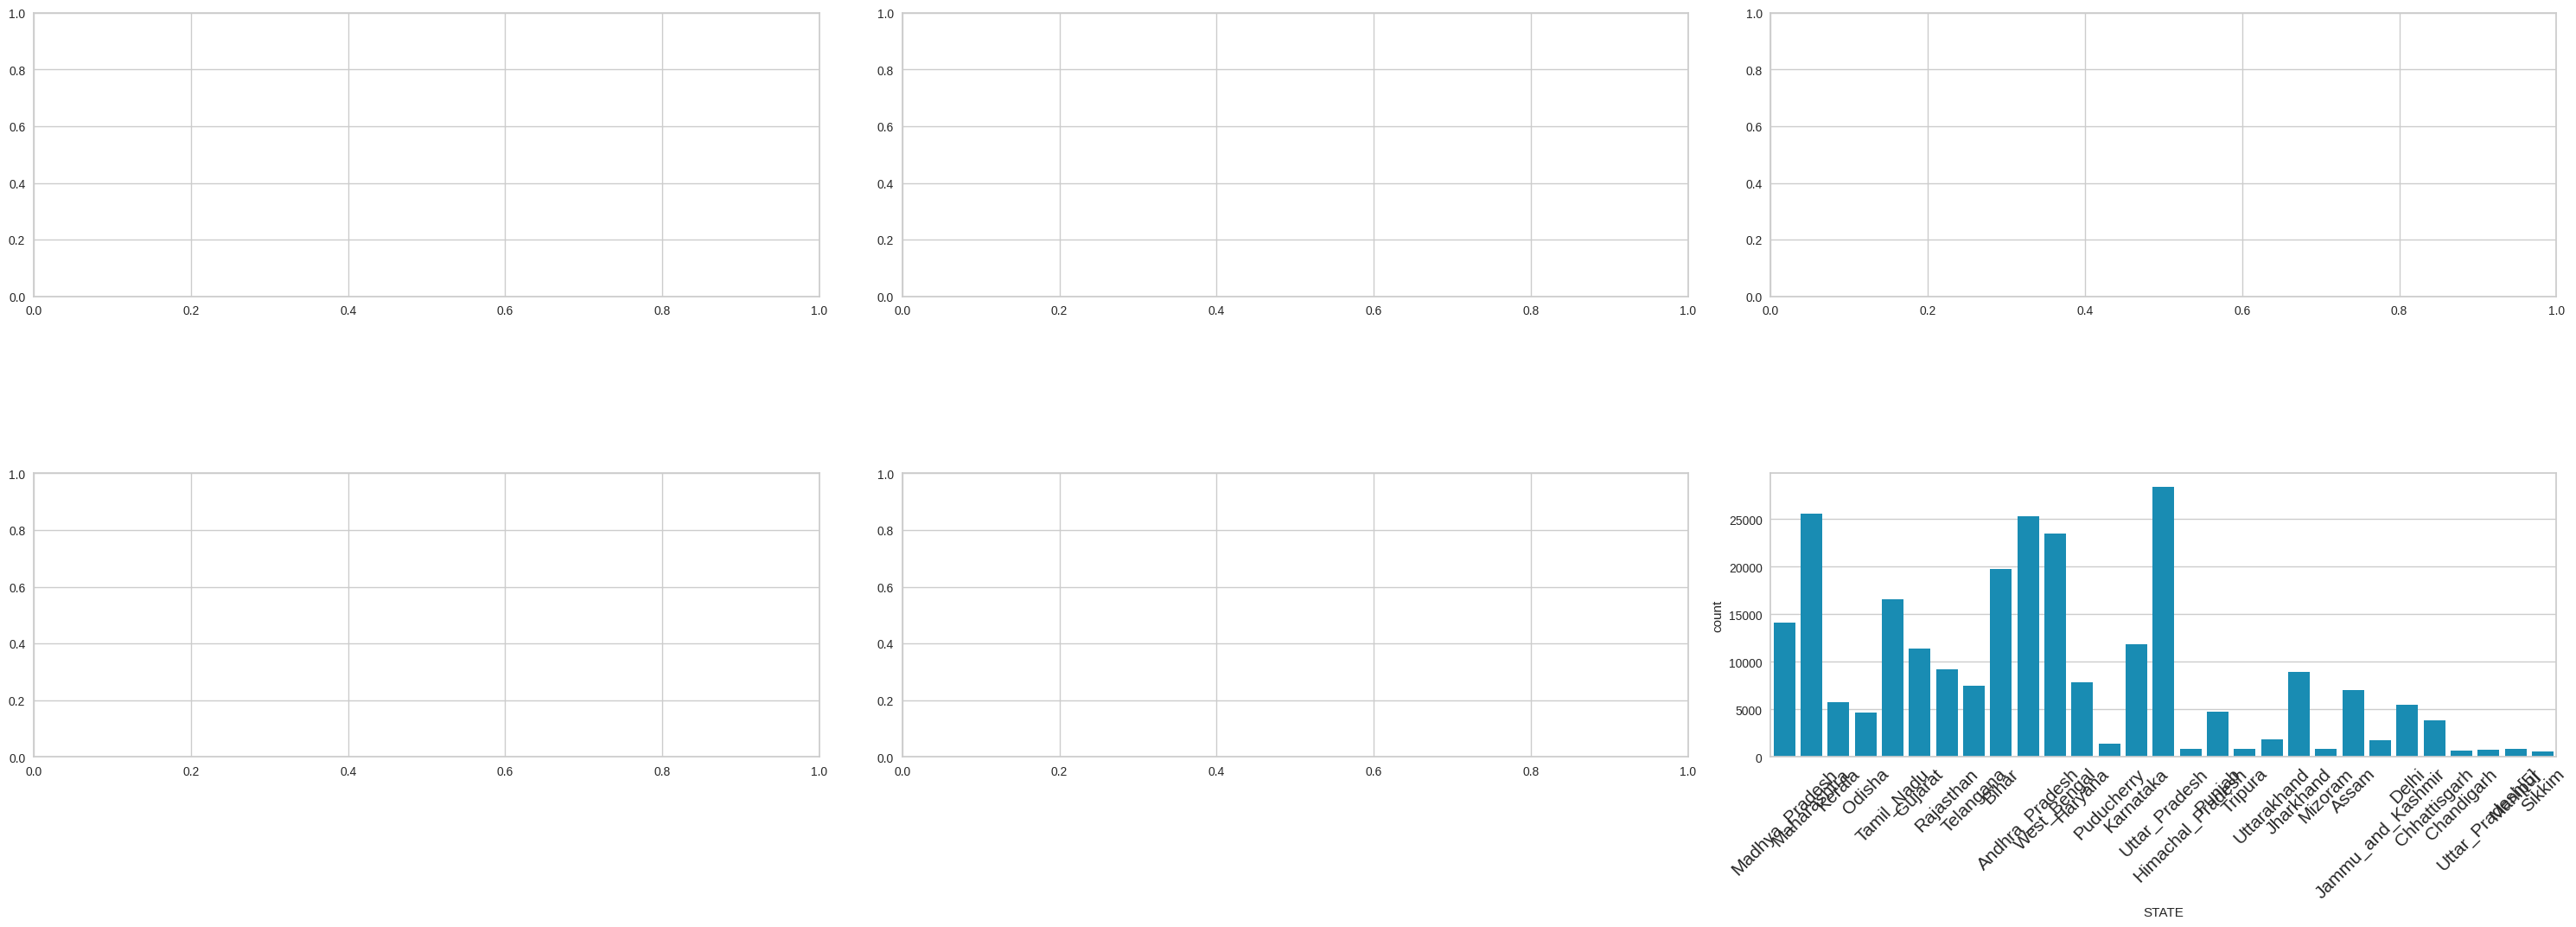

In [29]:
df_sample = df.sample(1000, random_state=44)
plt.figure(figsize=(30,25))
for i in range(0, len(cats)):
    plt.subplot(5, 3, i+1)
sns.countplot(x=df_3[cats[i]], color='#0099cc', orient='v')
plt.xticks(fontsize=15, rotation=45)
plt.tight_layout()

Pair plot

<Figure size 1500x1500 with 0 Axes>

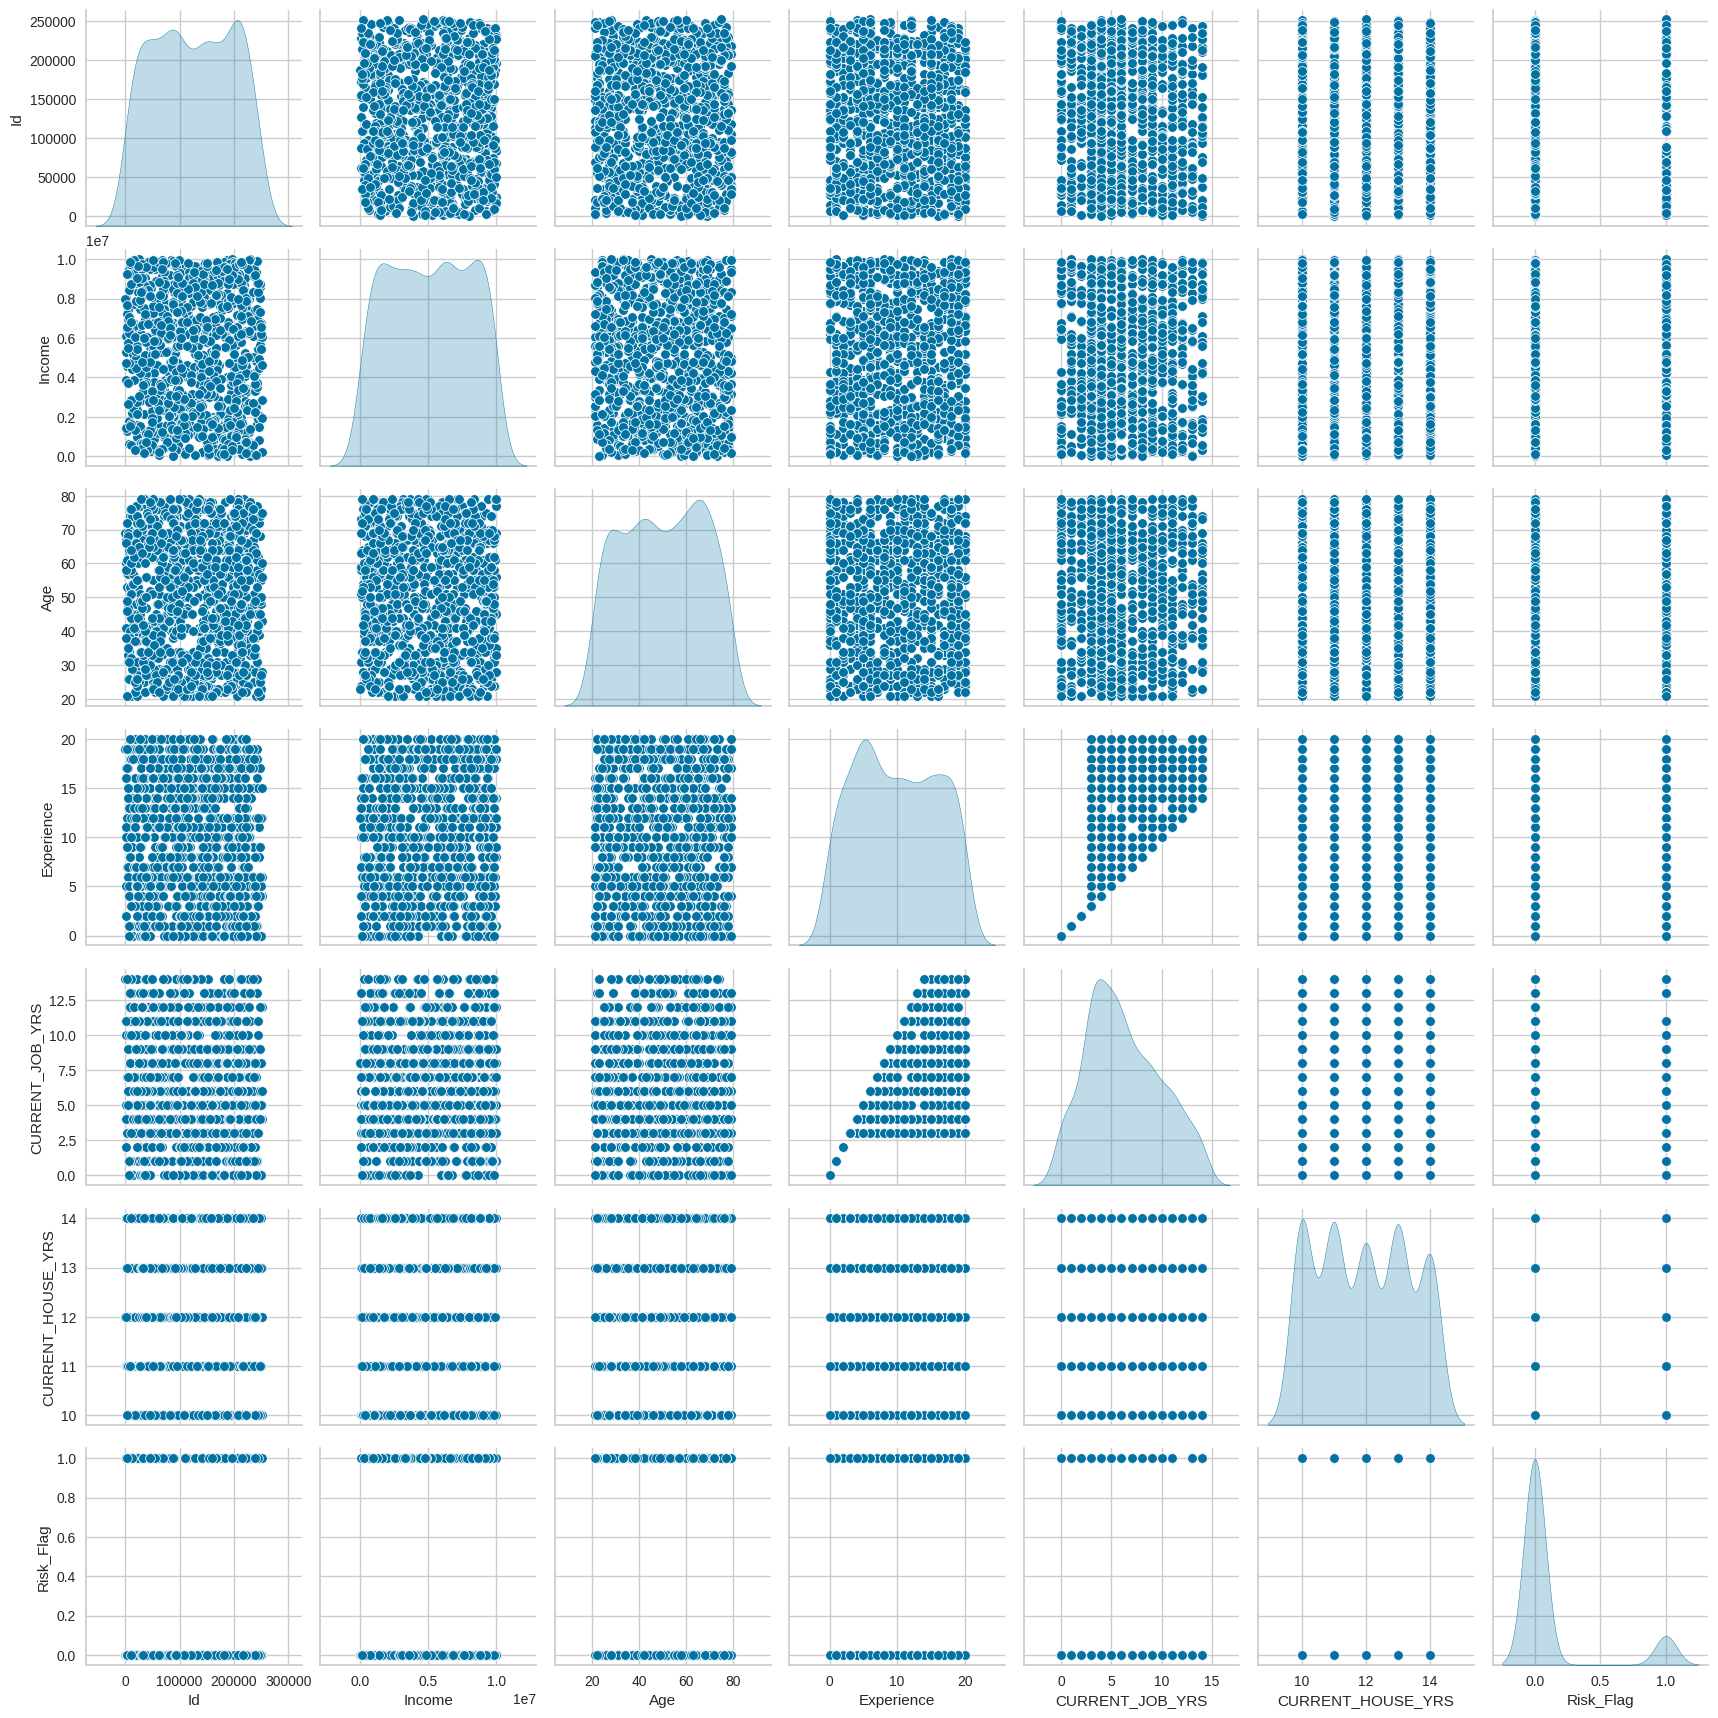

In [30]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde')

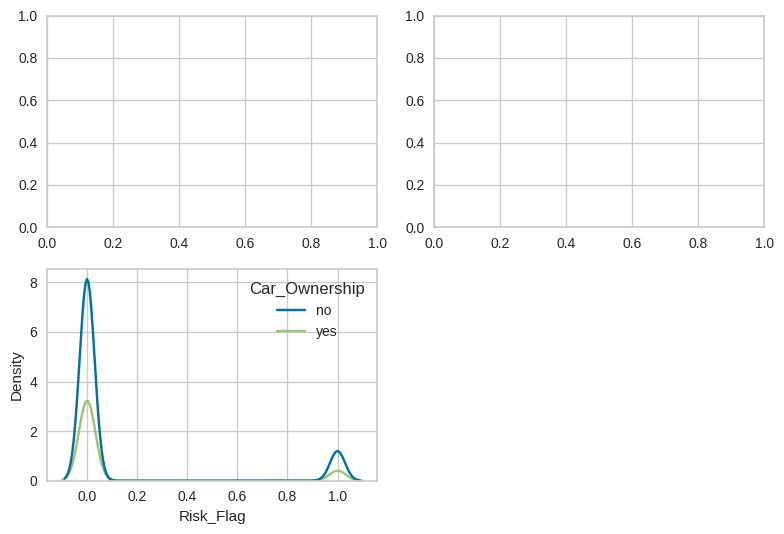

In [31]:
cats1 = cats = ['Married/Single', 'House_Ownership', 'Car_Ownership']
features = cats1
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
sns.kdeplot(data=df, x='Risk_Flag', hue=features[i])
            #plt.xlabel(features[i])
plt.tight_layout()

# OBSERVATIONS:

1)Age ,Experience and Income and uniformly distributed in the data.i.e. data contains people of ages 20 to 80 in uniformity
and similar is case for experience and income

2)We see that majority of data contain single people ,who stay in rented place and do not own a car

3)We also see that the ratio of default of single/married,rented/other cases and car ownership are similar to the default rate present in the data.

4)The target variable (Risk) is an unbalanced . i.e. data has majority 0's.

Data Preprocessing

In [33]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [35]:
missing_value_columns = []

for column in df.columns:
    unique_values = df[column].unique().tolist()
        # Double check for missing values
            # 1. Check if there is an empty space value in the column
                # 2. Check if there are any NaN/null values in the column
if " " in unique_values or sum([1 if str(value) == "nan" else 0 for value in unique_values]) > 0:
                            missing_value_columns.append(column)

                            print(missing_value_columns)


In [36]:
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [38]:
df.duplicated().sum()

0

In [40]:
df['CITY'].head().reset_index()

,index,CITY
0,0,Rewa
1,1,Parbhani
2,2,Alappuzha
3,3,Bhubaneswar
4,4,Tiruchirappalli[10]


In [43]:
df['CITY'] = df['CITY'].map(lambda x: x.split("[")[0] if "[" in x else x)
df['CITY'].head().reset_index()

,index,CITY
0,0,Rewa
1,1,Parbhani
2,2,Alappuzha
3,3,Bhubaneswar
4,4,Tiruchirappalli


In [44]:
df[nums].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


# FEATURE SELECTION

Chi square test for independence of attributes

In [45]:
crosstab = pd.crosstab(df['Married/Single'], df["Risk_Flag"])
crosstab

Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


In [46]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=111.89204667099783, pvalue=3.773053705715196e-26, dof=1, expected_freq=array([[ 22563.456,   3164.544],
       [198440.544,  27831.456]]))

Ho: The attributes are independent

Ha: The attributes are dependent

As the p value is 3.77e-26(<0.05),so we reject Ho.

Thus we conclude that marriage and risk flag are dependent .

In [47]:
crosstab = pd.crosstab(df['House_Ownership'], df['Risk_Flag'])
crosstab

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [48]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=182.98924138871385, pvalue=1.8381930028370595e-40, dof=2, expected_freq=array([[  6300.368,    883.632],
       [ 11329.086,   1588.914],
       [203374.546,  28523.454]]))

Ho: The attributes are independent

Ha: The attributes are dependent

As the p value is 1.84e-40(<0.05),so we reject Ho.

Thus we conclude that House ownership and risk flag are dependent .

In [49]:
crosstab = pd.crosstab(df['Car_Ownership'], df['Risk_Flag'])
crosstab

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [50]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=145.42374419378916, pvalue=1.7350853850183746e-33, dof=1, expected_freq=array([[154352.,  21648.],
       [ 66652.,   9348.]]))

Ho: The attributes are independent

Ha: The attributes are dependent

As the p value is 1.74e-33(<0.05),so we reject Ho.

Thus we conclude that Car ownership and risk flag are dependent .

In [51]:
stats.ttest_ind(df['Age'][df['Risk_Flag'] == 0],df['Age'][df['Risk_Flag'] == 1])

TtestResult(statistic=10.950730879694023, pvalue=6.687623646851126e-28, df=251998.0)

Ho:There is no significant effect of age on risk

Ha:There is significant effect of age on risk

Here p value is 6.69e-28(<0.05),so we reject Ho

Thus we conclude that there is significant effect of age on risk

In [52]:
stats.ttest_ind(df['Income'][df['Risk_Flag'] == 0],df['Income'][df['Risk_Flag'] == 1])

TtestResult(statistic=1.5517553379317441, pvalue=0.1207220319451374, df=251998.0)

Ho:There is no significant effect of income on risk

Ha:There is significant effect of income on risk

Here p value is 0.120722(>0.05),so we fail to reject Ho

Thus we conclude that there is no significant effect of income on risk.

In [53]:
stats.ttest_ind(df['Experience'][df['Risk_Flag'] == 0],df['Experience'][df['Risk_Flag'] == 1])

TtestResult(statistic=17.34048172684957, pvalue=2.5475634862877598e-67, df=251998.0)

Ho:There is no significant effect of experience on risk

Ha:There is significant effect of experience on risk

Here p value is 2.55e-67(<0.05),so we reject Ho
Thus we conclude that there is significant effect of experience on risk

# FINAL OBSERVATIONS

1)The significant numerical variables experience,age,while income is insignificant.

2)The significant categorical variables are car ownership,house ownership and marriage.

# ENCODING

In [54]:
x=pd.get_dummies(df['Married/Single'],drop_first=True)

In [55]:
df=pd.concat([df,x],axis=1)

In [56]:
df=df.drop('Married/Single',axis=1)

In [57]:
x=pd.get_dummies(df['House_Ownership'],drop_first=True)

In [58]:
df=pd.concat([df,x],axis=1)

In [59]:
df=df.drop('House_Ownership',axis=1)

In [60]:
x=pd.get_dummies(df['Car_Ownership'],drop_first=True)

In [61]:
df=pd.concat([df,x],axis=1)

In [62]:
df=df.drop('Car_Ownership',axis=1)

In [63]:
df1=df.copy()

In [64]:
df1

,Id,Income,Age,Experience,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,single,owned,rented,yes
0,1,1303834,23,3,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,True,False,True,False
1,2,7574516,40,10,Software_Developer,Parbhani,Maharashtra,9,13,0,True,False,True,False
2,3,3991815,66,4,Technical_writer,Alappuzha,Kerala,4,10,0,False,False,True,False
3,4,6256451,41,2,Software_Developer,Bhubaneswar,Odisha,2,12,1,True,False,True,True
4,5,5768871,47,11,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,Surgeon,Kolkata,West_Bengal,6,11,0,True,False,True,False
251996,251997,2843572,26,10,Army_officer,Rewa,Madhya_Pradesh,6,11,0,True,False,True,False
251997,251998,4522448,46,7,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,True,False,True,False
251998,251999,6507128,45,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0,True,False,True,False


In [65]:
df1=df1.drop(['Id','Income','CITY','STATE'],axis=1)

In [66]:
df_frquency = df1['Profession'].value_counts().to_dict()
df_frquency

{'Physician': 5957,
 'Statistician': 5806,
 'Web_designer': 5397,
 'Psychologist': 5390,
 'Computer_hardware_engineer': 5372,
 'Drafter': 5359,
 'Magistrate': 5357,
 'Fashion_Designer': 5304,
 'Air_traffic_controller': 5281,
 'Comedian': 5259,
 'Industrial_Engineer': 5250,
 'Mechanical_engineer': 5217,
 'Chemical_engineer': 5205,
 'Technical_writer': 5195,
 'Hotel_Manager': 5178,
 'Financial_Analyst': 5167,
 'Graphic_Designer': 5166,
 'Flight_attendant': 5128,
 'Biomedical_Engineer': 5127,
 'Secretary': 5061,
 'Software_Developer': 5053,
 'Petroleum_Engineer': 5041,
 'Police_officer': 5035,
 'Computer_operator': 4990,
 'Politician': 4944,
 'Microbiologist': 4881,
 'Technician': 4864,
 'Artist': 4861,
 'Lawyer': 4818,
 'Consultant': 4808,
 'Dentist': 4782,
 'Scientist': 4781,
 'Surgeon': 4772,
 'Aviator': 4758,
 'Technology_specialist': 4737,
 'Design_Engineer': 4729,
 'Surveyor': 4714,
 'Geologist': 4672,
 'Analyst': 4668,
 'Army_officer': 4661,
 'Architect': 4657,
 'Chef': 4635,
 'Lib

In [67]:
df1['Profession'] = df1['Profession'].map(df_frquency)

In [68]:
df1

,Age,Experience,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,single,owned,rented,yes
0,23,3,5217,3,13,0,True,False,True,False
1,40,10,5053,9,13,0,True,False,True,False
2,66,4,5195,4,10,0,False,False,True,False
3,41,2,5053,2,12,1,True,False,True,True
4,47,11,4413,3,14,1,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
251995,43,13,4772,6,11,0,True,False,True,False
251996,26,10,4661,6,11,0,True,False,True,False
251997,46,7,4729,7,12,0,True,False,True,False
251998,45,0,5166,0,10,0,True,False,True,False


# TRAIN TEST SPLIT AND SMOTE(FOR DATA BALANCING)

In [69]:
X = df1.drop(['Risk_Flag'],axis=1)
y = df1.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify = y, random_state = 42)

In [70]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [71]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train, y_train)

# MODEL FITTING

# LOGISTIC REGRESSION

In [72]:
model_logistic = LogisticRegression(max_iter = 100000)
model_logistic.fit(X_res, y_res)
y_pred = model_logistic.predict(X_test)

In [73]:
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 57.3503
Precision: 13.7679
F1-Score: 22.2051
Accuracy score: 50.5714
AUC Score: 53.4855


# NON LINEAR MODEL FITTING

In [74]:
df2=df.copy()

In [75]:
df2=df2.drop(['Id'],axis=1)

In [76]:
df_frquency = df2['Profession'].value_counts().to_dict()
df_frquency

{'Physician': 5957,
 'Statistician': 5806,
 'Web_designer': 5397,
 'Psychologist': 5390,
 'Computer_hardware_engineer': 5372,
 'Drafter': 5359,
 'Magistrate': 5357,
 'Fashion_Designer': 5304,
 'Air_traffic_controller': 5281,
 'Comedian': 5259,
 'Industrial_Engineer': 5250,
 'Mechanical_engineer': 5217,
 'Chemical_engineer': 5205,
 'Technical_writer': 5195,
 'Hotel_Manager': 5178,
 'Financial_Analyst': 5167,
 'Graphic_Designer': 5166,
 'Flight_attendant': 5128,
 'Biomedical_Engineer': 5127,
 'Secretary': 5061,
 'Software_Developer': 5053,
 'Petroleum_Engineer': 5041,
 'Police_officer': 5035,
 'Computer_operator': 4990,
 'Politician': 4944,
 'Microbiologist': 4881,
 'Technician': 4864,
 'Artist': 4861,
 'Lawyer': 4818,
 'Consultant': 4808,
 'Dentist': 4782,
 'Scientist': 4781,
 'Surgeon': 4772,
 'Aviator': 4758,
 'Technology_specialist': 4737,
 'Design_Engineer': 4729,
 'Surveyor': 4714,
 'Geologist': 4672,
 'Analyst': 4668,
 'Army_officer': 4661,
 'Architect': 4657,
 'Chef': 4635,
 'Lib

In [77]:
df2['Profession'] = df2['Profession'].map(df_frquency)

In [78]:
df_frquency = df2['CITY'].value_counts().to_dict()
df_frquency

{'Aurangabad': 1543,
 'Vijayanagaram': 1259,
 'Bhopal': 1208,
 'Bulandshahr': 1185,
 'Saharsa': 1180,
 'Vijayawada': 1172,
 'Srinagar': 1136,
 'Indore': 1130,
 'Hajipur': 1098,
 'New_Delhi': 1098,
 'Satara': 1096,
 'Navi_Mumbai': 1084,
 'Jorhat': 1079,
 'Ongole': 1067,
 'Bellary': 1065,
 'Giridih': 1064,
 'Erode': 1064,
 'Hospet': 1058,
 'Jodhpur': 1056,
 'Khammam': 1051,
 'Danapur': 1037,
 'Bareilly': 1036,
 'Bidhannagar': 1033,
 'Kolkata': 1033,
 'Satna': 1028,
 'Howrah': 1016,
 'Mango': 1016,
 'Agra': 1012,
 'Thanjavur': 1003,
 'Haridwar': 1001,
 'Anantapuram': 994,
 'Buxar': 985,
 'Farrukhabad': 985,
 'Deoghar': 985,
 'Pallavaram': 984,
 'Ulhasnagar': 977,
 'Thane': 976,
 'Raurkela_Industrial_Township': 976,
 'Arrah': 976,
 'Thrissur': 973,
 'Proddatur': 971,
 'Visakhapatnam': 971,
 'Dibrugarh': 971,
 'Bahraich': 970,
 'Gorakhpur': 965,
 'Kulti': 963,
 'Nanded': 963,
 'Kochi': 961,
 'Vadodara': 960,
 'Silchar': 958,
 'Sonipat': 956,
 'Adoni': 953,
 'Malda': 953,
 'Bhalswa_Jahangir_

In [79]:
df2['CITY'] = df2['CITY'].map(df_frquency)

In [80]:
df_frquency = df2['STATE'].value_counts().to_dict()
df_frquency

{'Uttar_Pradesh': 28400,
 'Maharashtra': 25562,
 'Andhra_Pradesh': 25297,
 'West_Bengal': 23483,
 'Bihar': 19780,
 'Tamil_Nadu': 16537,
 'Madhya_Pradesh': 14122,
 'Karnataka': 11855,
 'Gujarat': 11408,
 'Rajasthan': 9174,
 'Jharkhand': 8965,
 'Haryana': 7890,
 'Telangana': 7524,
 'Assam': 7062,
 'Kerala': 5805,
 'Delhi': 5490,
 'Punjab': 4720,
 'Odisha': 4658,
 'Chhattisgarh': 3834,
 'Uttarakhand': 1874,
 'Jammu_and_Kashmir': 1780,
 'Puducherry': 1433,
 'Mizoram': 849,
 'Manipur': 849,
 'Himachal_Pradesh': 833,
 'Tripura': 809,
 'Uttar_Pradesh[5]': 743,
 'Chandigarh': 656,
 'Sikkim': 608}

In [81]:
df2['STATE'] = df2['STATE'].map(df_frquency)

In [82]:
X = df1.drop(['Risk_Flag'],axis=1)
y = df1.Risk_Flag

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify = y, random_state = 42)

In [84]:
ss=MinMaxScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [85]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train, y_train)

# RANDOM FOREST (GINI)

In [86]:
cf=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=0)
cf.fit(X_res,y_res)
y_pred = cf.predict(X_test)

In [87]:
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 78.6214
Precision: 52.582
F1-Score: 63.0177
Accuracy score: 88.6495
AUC Score: 84.3387


# RANDOM FOREST (ENTROPY)

In [88]:
cf=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
cf.fit(X_res,y_res)
y_pred = cf.predict(X_test)

In [89]:
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 78.46
Precision: 52.8236
F1-Score: 63.1388
Accuracy score: 88.7315
AUC Score: 84.3161


# KNN(n=7)

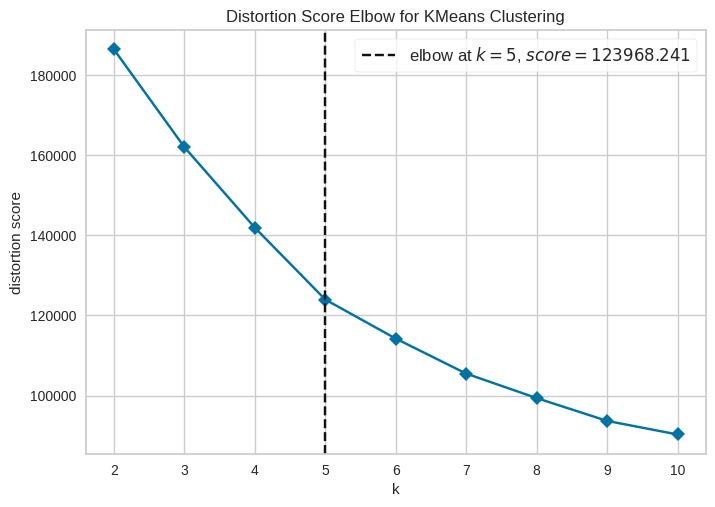

In [90]:
Elbow_M = KElbowVisualizer(KMeans(), k=10,timings=False)
Elbow_M.fit(X_res)
Elbow_M.show()
plt.show()

In [91]:
cf=KNeighborsClassifier(n_neighbors=7,weights='distance')
cf.fit(X_res,y_res)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [92]:
y_pred=cf.predict(X_test)

In [93]:
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 58.802
Precision: 46.2449
F1-Score: 51.7729
Accuracy score: 86.5251
AUC Score: 74.6077


# DECISION TREES(GINI)

In [94]:
cf=DecisionTreeClassifier(random_state=0,criterion="gini")
cf.fit(X_res,y_res)

DecisionTreeClassifier(random_state=0)

In [95]:
y_pred=cf.predict(X_test)

In [96]:
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 82.2884
Precision: 49.0104
F1-Score: 61.4322
Accuracy score: 87.291
AUC Score: 85.1405


# DECISION TREES(ENTROPY)

In [97]:
cf=DecisionTreeClassifier(random_state=0,criterion='entropy')
cf.fit(X_res,y_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [98]:
y_pred=cf.predict(X_test)

In [99]:
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 82.4282
Precision: 49.1378
F1-Score: 61.5712
Accuracy score: 87.3439
AUC Score: 85.2308


# XGB

In [100]:
cf=XGBClassifier()
cf.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
y_pred=cf.predict(X_test)

In [102]:
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 69.986
Precision: 38.5431
F1-Score: 49.7097
Accuracy score: 82.582
AUC Score: 77.1673


CatBoost classifier